<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 1 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-1</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques. i) El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves. (ii) El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes. (iii) El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Consideremos la siguiente función:

$$
f(x) = 2\,\exp(x)\,\sin(2\,x)^2
$$

A continuación se muestra una gráfica de la función:

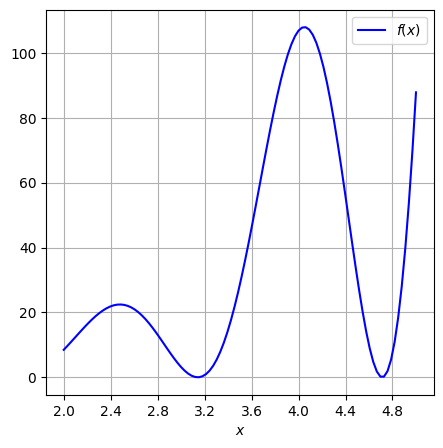

In [2]:
f = lambda x: 2.*np.exp(x)*np.power(np.sin(2.*x),2)

plt.figure(figsize=(5,5))
x = np.linspace(2.,5.,100)
y = f(x)
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(2.,5.,.4))
plt.legend(loc='best')
plt.show()

Podemos notar que en el intervalo $[2.8,4.8]$ la función tiene dos raíces. Analicemos primero el intervalo $[2.8,3.6]$, en este caso, si aplicamos el método de la Bisección tenemos que $f(2.8)\,f(3.6) > 0$, por lo tanto, el método falla y no inicia una búsqueda de la raíz. Lo mismo sucede en el intervalo $[4.4,4.8]$. Lo podemos verificar, ejecutando el método de la Bisección en los intervalos indicados.

# Funciones Entregadas (No debe modificarlas)

In [3]:
def bisect(f, a, b, tol=1e-12):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   left value of interval.
    b   : (double)   right value of interval.
    tol : (double)   tolerance.
    
    output:
    xc  : (double)   root approximation of f. 
    """
    fa = f(a)
    fb = f(b)
    i = 0
    if np.sign(fa*fb) > 0:
        return None
    
    while((b-a)/2 > tol):
        c = (a+b)/2
        fc = f(c)
        if fc == 0:
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
    xc = (a + b)/2
    return xc

Ejecutamos el método de la Bisección en el intervalo $[2.8,3.6]$:

In [4]:
bisect(f,2.8,3.6) == None

True

Ejecutamos el método de la Bisección en el intervalo $[4.4,4.8]$:

In [5]:
bisect(f,4.4,4.8) == None

True

# Búsqueda de puntos críticos!

Una solución para el problema anterior, es abordarlo como una búsqueda de puntos críticos, es decir, encontrar los puntos donde la derivada de la función es igual a $0$. Podemos notar, que en el intervalo $[2.8,4.8]$ existen dos puntos críticos, los cuales son a su vez las raíces de $f(x)$!

# Pregunta 1.

Utilice el método de la Bisección para encontrar un punto crítico de una función $f(x)$ en un intervalo $[a,b]$. Para abordar este problema utilice la siguiente aproximación para la derivada de $f(x)$ en el punto $x$ denominada *diferencia finita central*:

$$
f'(x) \approx \dfrac{f(x + h) - f(x - h)}{2h}
$$

donde $h$ es el paso de la aproximación.

1.1 (10 puntos) Construya la aproximación de la derivada para una función $f(x)$.

In [6]:
def fp(f,x,h):
    """
    input:
    f   : (callable) function to evaluate.
    x   : (double)   point where the derivative is approximated.
    h   : (double)   approximation step.
    
    output:
    yp  : (double)   derivative approximation of f at x. 
    """
    #acá va su codigo
    #--------------------------------
    f1 = f(x+h)
    f2 = f(x-h)
    yp = (f1-f2)/(2.*h)
    #--------------------------------
    return yp

1.2 (25 puntos) Construya un algoritmo que utilice el método de la Bisección, y permita encontrar un punto crítico $x_c$ para una función $f(x)$ en el intervalo $[a,b]$ con un paso de aproximación $h$. En caso de que el punto no sea encontrado, debe retornar **None**.

*Hint: your implementation must call the bisection method provided.*

In [7]:
def critical_point(f, a, b, h, tol_cp=1e-12):
    """
    input:
    f      : (callable) function to evaluate.
    a      : (double)   left value of interval.
    b      : (double)   right value of interval.
    h      : (double)   approximation step.
    tol_cp : (double)   tolerance for the critical point approximation.
    
    output:
    xc  : (double)   critical point approximation of f in the interval [a,b].
    """
    #acá va su codigo
    #--------------------------------
    funcion_derivada = lambda x: fp(f,x,h) # la derivada ahora solo depende de 'x'
    xc = bisect(funcion_derivada,a,b,tol_cp) # con esto obtenemos la raiz de la derivada (punto critico de 'f')
    #--------------------------------
    return xc

1.3 (5 puntos) Determine la raíz $r_1$ para la función $f(x) = 2\,\exp(x)\,\sin(2\,x)^2$ en el intervalo $[2.8,3.6]$ con $h = 10^{-6}$.

In [8]:
#acá va su codigo
#--------------------------------
a = 2.8
b = 3.6
h = 1e-6
r1 = critical_point(f,a,b,h)
r1
#--------------------------------

3.1415926535897603

1.4 (5 puntos) Seleccione un valor para $h$ en función de la siguiente gráfica, que muestra la relación entre $h$ y el error relativo de la raíz $r_1$. Justifique su respuesta.

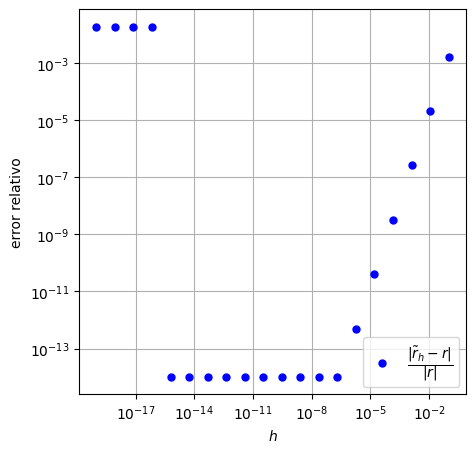

In [9]:
h = np.logspace(-19,-1,20)
cp = lambda h: critical_point(f,a,b,h)
cp_vec = np.vectorize(cp)
cp_arr = cp_vec(h)
error_rel = np.abs(cp_arr - np.pi)/np.pi

plt.figure(figsize=(5,5))
plt.loglog(h,error_rel,'b.', label=r'$\dfrac{|\tilde{r}_h - r|}{|r|}$', markersize=10)
plt.grid(True)
plt.xlabel(r'$h$')
plt.ylabel('error relativo')
plt.legend(loc='best')
plt.show()

Escriba su justificación de la elección de $h$:

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

Seleccionamos un valor de $h = 10^{-6}$, ya que, para ese valor, el error relativo en el calculo del punto crítico es el menor de todos. Además, se puede notar que luego de $h = 10^{-6}$, el error se mantiene constante hasta $h = 10^{-15}$. Más aún, a partir de $h = 10^{-16}$, el error relativo aumenta en gran medida y se mantiene constante. Esto tiene que ver principalmente con la pérdida de importancia en cálculos con valores de $h$ muy pequeños, lo que puede llevar a errores de redondeo y de representación en doble precisión.

**---------------------------------------------------------------------------------------------------------------------------**

# Pregunta 2.

Sea la función $f_1(x) = \exp(x)\,((x - 2.5)^2 - 1.5)$. Podemos observar que la función en el intervalo $[0,4]$ tiene dos raíces $r_1$ y $r_2$ con multiplicidad $1$. 

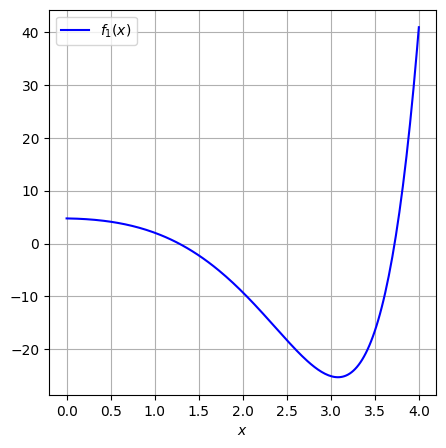

In [10]:
f1 = lambda x: np.exp(x)*(np.power(x - 2.5,2) - 1.5)

plt.figure(figsize=(5,5))
x = np.linspace(0.,4.,200)
y = f1(x)
plt.plot(x,y,'b-', label='$f_1(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.show()

2.1 (30 puntos) Considere que ahora usted dispone de una función $f(x)$ en un intervalo $[a,b]$, tal que existen dos raíces $r_1$ y $r_2$ con multiplicidad $1$ y solamente un punto crítico $x_c$ en $[a,b]$ tal que $f'(x_c) = 0$. Construya un algoritmo que permita encontrar ambas raíces basado en el método de la Bisección. En caso de que no sea posible encontrar las raíces, debe retornar **None** para $r_1$ y $r_2$.

*Hint: it would be very useful to use the algorithm implemented before, i.e. critical_point, within your code.*

In [11]:
def both_roots(f,a,b,h,tol=1e-12):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   left value of interval.
    b   : (double)   right value of interval.
    h   : (double)   approximation step.
    tol : (double)   tolerance.
    
    output:
    r1  : (double)   approximation of root r1.
    r2  : (double)   approximation of root r2.
    """
    #acá va su codigo
    #--------------------------------
    xc = critical_point(f,a,b,h,tol)

    # El punto critico muestra donde la funcion cambia de sentido, por lo que se
    # puede dividir el intervalo en dos para cada raiz

    intervalo1 = [a,xc]
    intervalo2 = [xc,b]

    r1 = bisect(f,intervalo1[0],intervalo1[1],tol)
    r2 = bisect(f,intervalo2[0],intervalo2[1],tol)
    #--------------------------------
    return r1,r2

2.2 (5 puntos) Determine las raíces $r_1$ y $r_2$ en el intervalo $[0,4]$ para $f_1(x)$.

In [12]:
#acá va su codigo
#--------------------------------
both_roots(f1,0.,4.,1e-6)
#--------------------------------

(1.275255128608068, 3.7247448713915006)

2.3 Sea la función $f_2(x) = 0.5\,\exp(x)\,\sin(3x)^2 - 10$. Ejecute el algoritmo *both_roots* para encontrar las raíces $r_1$ y $r_2$ en el intervalo $[0,4]$, es decir, ejecute el siguiente código:

In [13]:
f2 = lambda x: .5*np.exp(x)*np.power(np.sin(3.*x),2) - 10.
h = 1e-7
both_roots(f2,0.,4.,h)

(None, None)

2.4 (10 puntos) ¿Ha encontrado las raíces $r_1$ y $r_2$? Si no es así, ¿Cómo usted debería ejecutar el algoritmo *both_roots* para encontrar ambas raíces?

*Hint 1: it would helpful to observe $f_2(x)$ on the interval of interest.*

*Hint 2: Do you observe any issues with the number of critical points available?*

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

No se han encontrado las raíces $r_1$ y $r_2$ para la función $f_2$ con el algoritmo *both_roots*. Esto se debe a que la función $f_2'$ contiene multiples raíces en el intervalo $[0,4]$. Es decir, la función $f$ posee multiples puntos críticos. El algoritmo de bisección que ocurre dentro de *both_roots* no es capaz de encontrar el punto critico que nos sirve para poder obtener ambas raíces.

En otras palabras, el punto critico $x_c$ obtenido en *both_roots* separa el intervalo $[0,4]$ en dos intervalos: $[0,x_c]$ y $[x_c,4]$. Sin embargo, $f_2(0) \cdot f_2(x_c) > 0$ y $f_2(x_c) \cdot f_2(4) > 0$, lo que impide que el algoritmo de bisección pueda encontrar las raíces $r_1$ y $r_2$. Pero esto no nos asegura que **no** hayan raíces en medio.

Para poder encontrar ambas raíces, se debe ejecutar el algoritmo *both_roots* en los intervalos $[0,x_c]$ y $[x_c,4]$ por separado. De esta forma, a diferencia de buscar raíces, estaríamos buscando **otros** puntos críticos en dichos intervalos, con los cuales podemos estimar el cambio de sentido de la función y encontrar las dos raíces.

**---------------------------------------------------------------------------------------------------------------------------**

In [14]:
#acá va su codigo
#--------------------------------
a = 0.
b = 4.
h = 1e-7
xc = critical_point(f2,a,b,h)

both_roots(f2,a,xc,h), both_roots(f2,xc,b,h)
#--------------------------------

((None, None), (3.449120709903324, 3.967994372635852))